# Notebook 7: Logistic Regression and SoftMax for MNIST

## Learning Goal

The goal of this notebook is to familiarize the reader with SoftMax regression (a generalization of logistic regression to more than two categories), categorical predictions, and the MNIST handwritten dataset. The reader will understand how to use the Scikit Logistic regression package and visualize learned weights.

## Overview
### The MNIST dataset:
The MNIST classification problem is one of the classical ML problems for learning classification on high-dimensional data with a fairly sizable number of examples (60000). Yann LeCun and collaborators collected and processed $70000$ handwritten digits (60000 are used for training and 10000 for testing) to produce what became known as one of the most widely used datasets in ML: the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Each handwritten digit comes in a grayscale square image in the shape of a $28\times 28$ pixel grid. Every pixel takes a value in the range $[0,255]$, representing $256$ nuances of the gray color. The problem of image classification finds applications in a wide range of fields and is important for numerous industry applications of ML. 
### SoftMax regression:
We will use SoftMax regression, which can be thought of as a statistical model which assigns a probability that a given input image corresponds to any of the 10 handwritten digits. The model is a generalization of the logistic regression and reads:
\begin{align}
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T}},
\end{align}
Where $p(y=i|\boldsymbol{x};W)$ is the probability that input $\boldsymbol{x}$ is the $i$-th digit, $i\in[0,9]$.
The model also has 10 weight vectors $\boldsymbol{w}_i$ which we will train below. Finally, one can use this information for prediction by taking the value of $y$ for which this probability is maximized:
\begin{align}
y_{pred}=\arg\max_i p(y=i|\boldsymbol{x})
\end{align}

## Numerical Experiments

The reader is invited to check out the code below to build up their intuition about SoftMax regression. The following notebook is a slight modification of [this Scikit tutorial](http://scikit-learn.org/dev/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html) by Arthur Mensch on studying the MNIST problem using Logistic Regression.

In [10]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


def mnist(solver,penalty,multiclass,train_size):
    #print(__doc__)

    # Turn down for faster convergence
    t0 = time.time()
    train_size = train_size
    test_size = 10000

    ### load MNIST data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

    # shuffle data
    random_state = check_random_state(0)
    permutation = random_state.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    X = X.reshape((X.shape[0], -1))

    # pick training and test data sets 
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

    # scale data to have zero mean and unit variance [required by regressor]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # apply logistic regressor with 'sag' solver, C is the inverse regularization strength
    clf = LogisticRegression(C=1e5,
                             multi_class=multiclass,
                             penalty=penalty, solver=solver, tol=0.1)
    # fit data
    clf.fit(X_train, y_train)
    # percentage of nonzero weights
    sparsity = np.mean(clf.coef_ == 0) * 100
    # compute accuracy
    score = clf.score(X_test, y_test)

    #display run time
    run_time = time.time() - t0
    #print('Example run in %.3f s' % run_time)

    #print("Sparsity with L2 penalty: %.2f%%" % sparsity)
    #print("Test score with L2 penalty: %.4f" % score)

    return(score,sparsity)

In [4]:
mnist('sag','l2','multinomial',50000)

Automatically created module for IPython interactive environment
Example run in 30.262 s
Sparsity with L2 penalty: 8.67%
Test score with L2 penalty: 0.8977


(0.8977, 8.673469387755102)

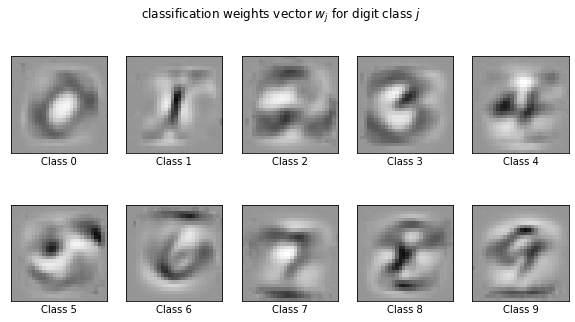

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

### Exercises: ###  
<ul>
<li> The snippet above invoked the "sag" solver which only deals with $L2$ regularization. Try another solver, e.g. 'liblinear', in scikit that supports $L1$ regularization. You can find more details on <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.</a>
<li> Visualize the misclassified samples. Analyze on how logistic regression performs on MNIST, and note this since we will study the MNIST problem later on using deep neural nets.

<li> Try to vary the size of the training set and see how that affects the accuracy.
<li>  [Theory] In this notebook, we considered a $K=10$ multi-class logistic regression (MLR) also known as the SoftMax regression. Recall that the our model reads:
$$
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T \boldsymbol{x}}}
$$
Use this to construct the likelihood function $P(y|\boldsymbol{x})$.

<li> [Theory] Now consider we're given a set of i.i.d. data $\mathcal{D}=\{(\boldsymbol{x}_1,y_1),\cdots, (\boldsymbol{x}_n,y_n)\}$. As we argued in the main text, the cross-entropy error used in logistic regression is motivated by maximizing the likelihood (or equivalently, minimizing the negative log-likelihood), find the corresponding error function $E(\boldsymbol{w}_0,\cdots,\boldsymbol{w}_9)$ in MLR using the hypothesis above. 

<li> [Theory] Using the error function derived above, calculate its gradient $\frac{\partial E}{\partial \boldsymbol{w}_k}$. Can you find an elegant way of writing the gradient?
</ul>


# Use saga solver with l1 norm

In [6]:
mnist('saga','l1','multinomial',50000)

Automatically created module for IPython interactive environment
Example run in 34.499 s
Sparsity with L2 penalty: 8.67%
Test score with L2 penalty: 0.8917


(0.8917, 8.673469387755102)

<b>Since multinomial is not available for liblinear, I just use saga instead. We can find that sparsity is same but accuracy is a little bit smaller. The change on the accuracy is reasonable, since l1 can cancel some coef. But I don't understand why sparsity stay same , should be higher. 
    

# Various training size with performance

In [55]:
import matplotlib.pyplot as plt
num = np.logspace(1,4.778,10)
size = num.astype(int)
print(size)
accuracy_lis =[]
spars_lis = []
for s in size: 
    acuracy, spars = mnist('sag','l2','multinomial',s)
    accuracy_lis.append(acuracy)
    spars_lis.append(spars)

[   10    26    69   181   477  1255  3301  8678 22815 59979]


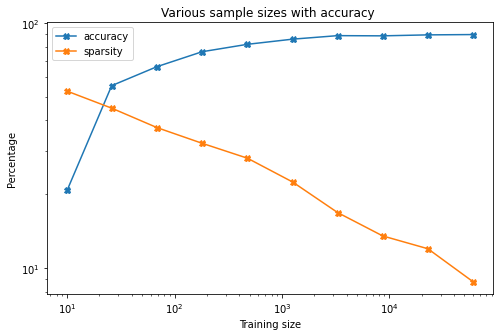

In [56]:
plt.figure(figsize=(8,5))
plt.plot(size,np.array(accuracy_lis)*100,marker = 'X', linestyle = '-',label='accuracy')
plt.plot(size,spars_lis,marker = 'X',linestyle = '-',label='sparsity')
plt.title("Various sample sizes with accuracy ")
plt.xlabel('Training size')
plt.ylabel('Percentage')
plt.yscale('log')
plt.xscale('log')
plt.legend()

<b>From graph, it is very reasonable that the larger training size give a higher accuracy and lower sparsity. Acurracy have a linear increasing, sparsity have a logrism decreasing.

# Visulization of misclassification

In [241]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)



Automatically created module for IPython interactive environment
Example run in 30.472 s
Sparsity with L2 penalty: 9.57%
Test score with L2 penalty: 0.8930


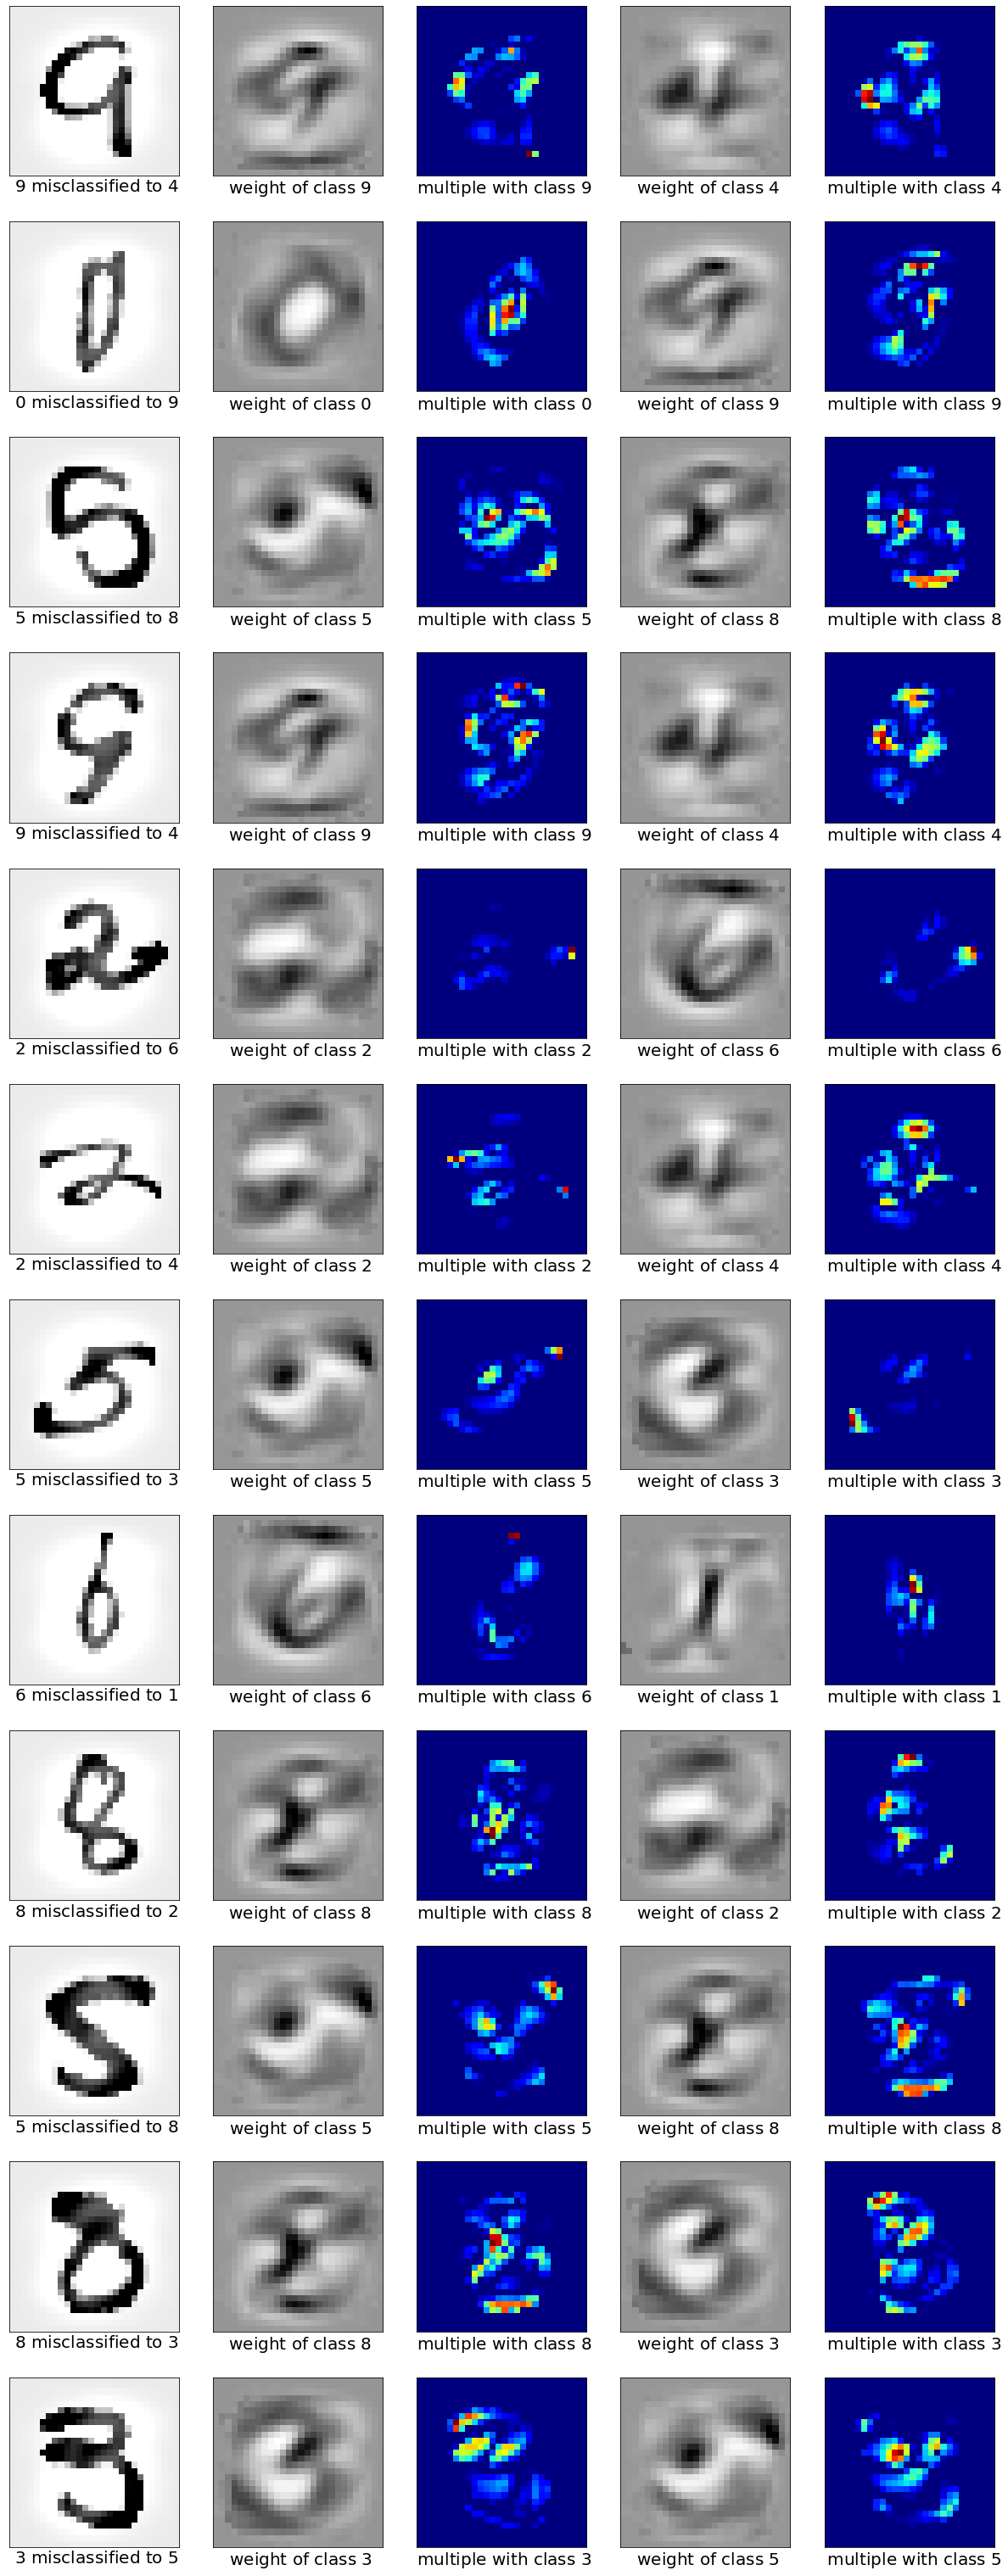

In [255]:
prediction = clf.predict(X_test[0:300])
#scale = np.abs(coef).max()
t = 0
plt.figure(figsize=(15,60))
# chaos...I don't want to comment the following code, just trash.
for i in range(100):
    
    
    if prediction[i] != y_test[i]: 
        t += 1 
        axx = plt.subplot(13,5,t)
        label_prid = np.float(prediction[i])
        label_true = np.float(y_test[i])
        axx.imshow(X_test[i].reshape(28, 28), interpolation='nearest',
                       cmap=plt.cm.Greys, vmin=-0.3, vmax=1.7)
        axx.set_xticks(())
        axx.set_yticks(())
        axx.set_xlabel(' $%.f$ misclassified to $%.f$'%(label_true,label_prid),fontsize=20)
        plt.subplots_adjust(right=1.2)
        t += 1 
        label = np.int(y_test[i])
        
        axx = plt.subplot(13,5,t)
        label_prid = np.float(prediction[i])
        scale = np.abs(coef[label]).max()
        axx.imshow(coef[label].reshape(28, 28), interpolation='nearest',
                       cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
        #axx.imshow(coef[label].reshape(28, 28),
                       #cmap=plt.cm.Greys#, vmin=0, vmax=1)
        axx.set_xticks(())
        axx.set_yticks(())
        axx.set_xlabel(' weight of class $%.f$'%(label),fontsize=20)
        plt.subplots_adjust(right=1.2)
        t += 1 
        label = np.int(y_test[i])
        
        axx = plt.subplot(13,5,t)
        label_prid = np.float(prediction[i])
        scale0 = np.abs(X_test[i]*coef[label]).max()
        axx.imshow(abs(X_test[i].reshape(28, 28)*coef[label].reshape(28, 28)), interpolation='nearest',
                       cmap=plt.cm.jet, vmin=0.15*scale0, vmax=1*scale0)
        #axx.imshow(coef[label].reshape(28, 28),
                       #cmap=plt.cm.Greys#, vmin=0, vmax=1)
        axx.set_xticks(())
        axx.set_yticks(())
        axx.set_xlabel(' multiple with class $%.f$'%(label),fontsize=20)
        plt.subplots_adjust(right=1.2)
        t += 1 
        label2 = np.int(prediction[i])
        
        axx = plt.subplot(13,5,t)
        label_prid = np.float(prediction[i])
        scale2 = np.abs(coef[label2]).max()
        axx.imshow(coef[label2].reshape(28, 28), interpolation='nearest',
                       cmap=plt.cm.Greys, vmin=-scale2, vmax=scale2)
        #axx.imshow(coef[label].reshape(28, 28),
                       #cmap=plt.cm.Greys#, vmin=0, vmax=1)
        axx.set_xticks(())
        axx.set_yticks(())
        axx.set_xlabel(' weight of class $%.f$'%(label2),fontsize=20)
        plt.subplots_adjust(right=1.2)

        t += 1 
        label2 = np.int(prediction[i])
        
        axx = plt.subplot(13,5,t)
        label_prid = np.float(prediction[i])
        scale3 = np.abs(X_test[i]*coef[label2]).max()
        axx.imshow(abs(X_test[i].reshape(28, 28)*coef[label2].reshape(28, 28)),interpolation='nearest',
                       cmap=plt.cm.jet, vmin=0.15*scale3, vmax=1*scale3)
        #axx.imshow(coef[label].reshape(28, 28),
                       #cmap=plt.cm.Greys#, vmin=0, vmax=1)
        axx.set_xticks(())
        axx.set_yticks(())
        axx.set_xlabel('  multiple with class $%.f$'%(label2),fontsize=20)
        plt.subplots_adjust(right=1.2)

plt.show()

    #print(t)

<b> We can find that some of the misclassified number is very hard to identify.

<b>Try to find how logestic regression works on MNIST. I multiply the matrix with the weight matrix of wrong prediction and true value and then plot the absolute value. We can found in most case, the product with the wrong prediction have larger area of features. I think this is how weight works in the prediction of the model. 
    
Also size of the number can be a problem. For two "2" pic above, we can clear identify it, but the weight of the class2 is too big on the plot, then we can see they barely have any interaction when multiply. 

<b>Logestic regression learn the every pixel feature from the training data, and record them in the weight of the coef. Then after enough training, use the weight to fit the test data and see their overlap. Then give the probability of the number. 

In [ ]:
ADR: This is a nice way of exploring the misclassification. It suggests ways of fixing it.
    2/2